<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite"
filename = "m4_survey_data.sqlite"

response = requests.get(url)
with open(filename, 'wb') as f:
    f.write(response.content)

print("File downloaded successfully.")

File downloaded successfully.


Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [8]:
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

# Suppress FutureWarning from Seaborn
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated", category=FutureWarning)

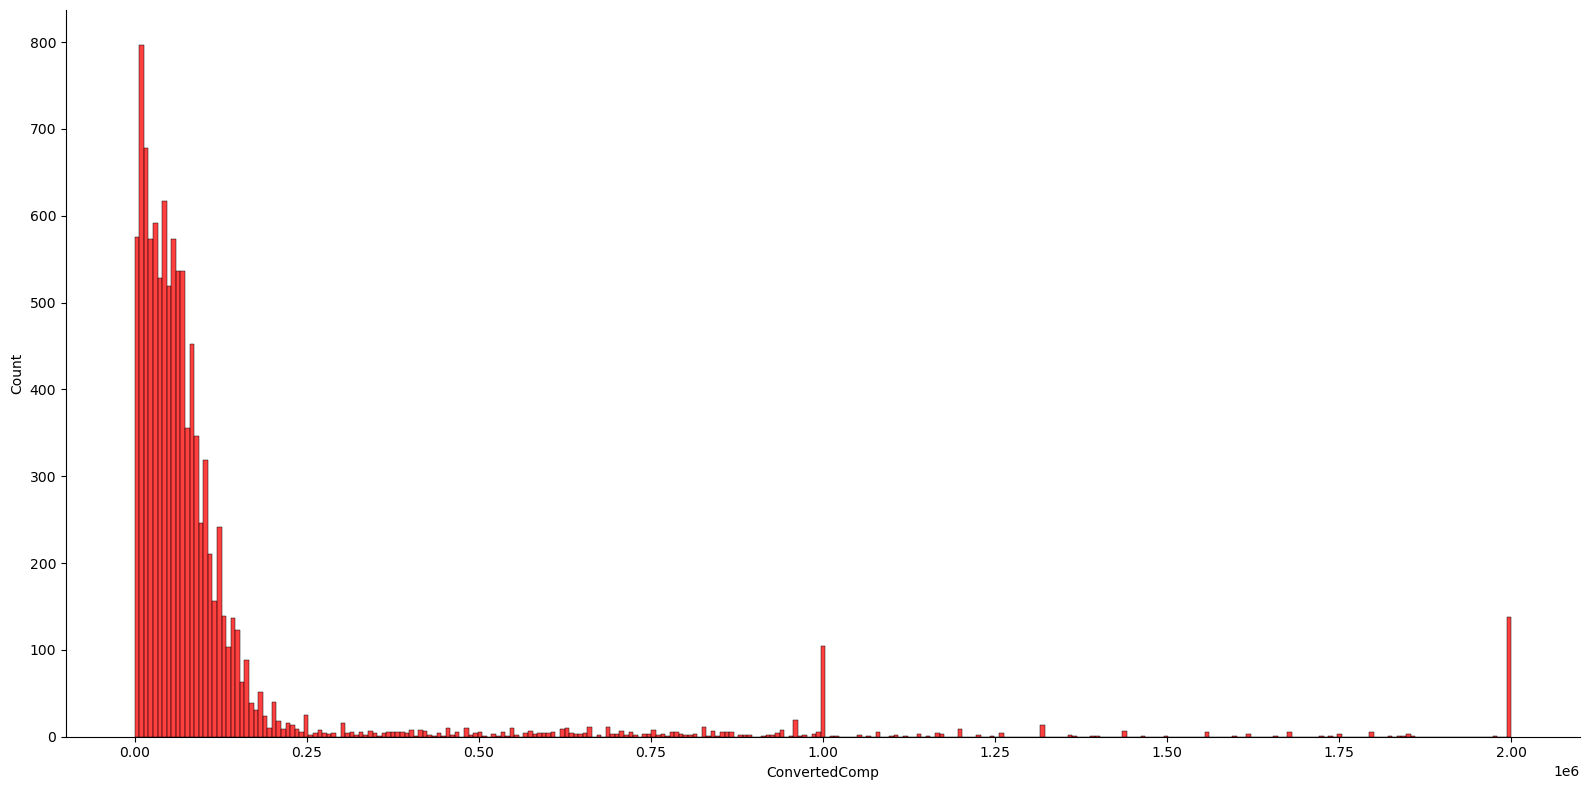

In [9]:
cc_query ="""
SELECT ConvertedComp 
FROM master
"""

cc_dataFrame = pd.read_sql_query(cc_query, conn)
sns.displot(cc_dataFrame, height=8, aspect=2, x='ConvertedComp', color='red')
plt.show()

### Box Plots


Plot a box plot of `Age.`


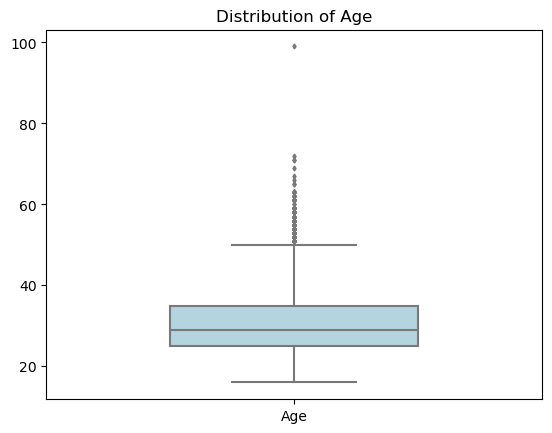

In [10]:
query = """
SELECT Age
FROM master
"""

ageData = pd.read_sql_query(query, conn)
age_box = sns.boxplot(ageData, width=0.5, orient='v', color='lightblue', linewidth=1.5, fliersize=2.5)
age_box.set_title('Distribution of Age')
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


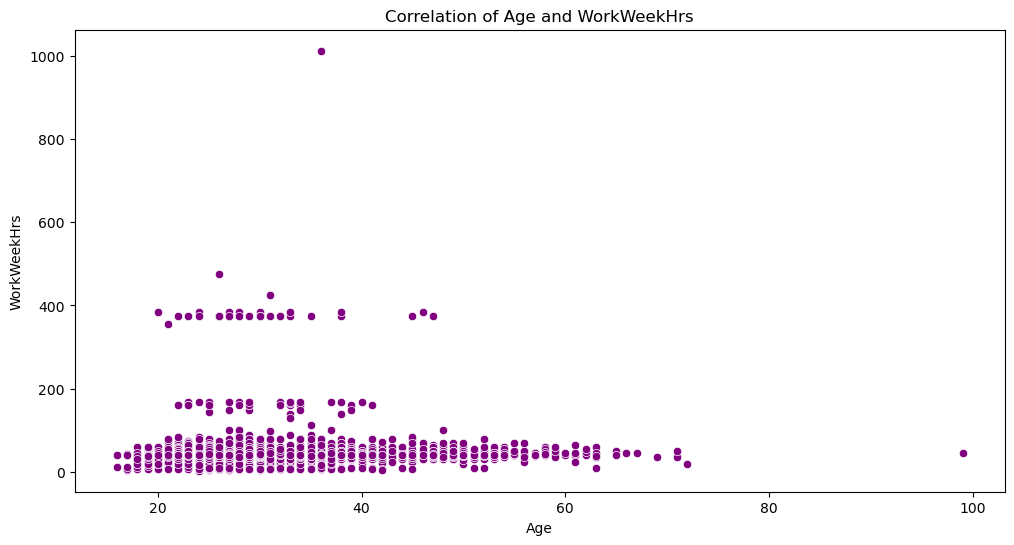

In [11]:
age_wwh_query = """
SELECT Age, WorkWeekHrs
FROM master
"""
age_wwh_data = pd.read_sql_query(age_wwh_query, conn)
plt.figure(figsize=(12,6))
sns.scatterplot(data=age_wwh_data, x='Age', y='WorkWeekHrs', color="purple")
plt.title('Correlation of Age and WorkWeekHrs')
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


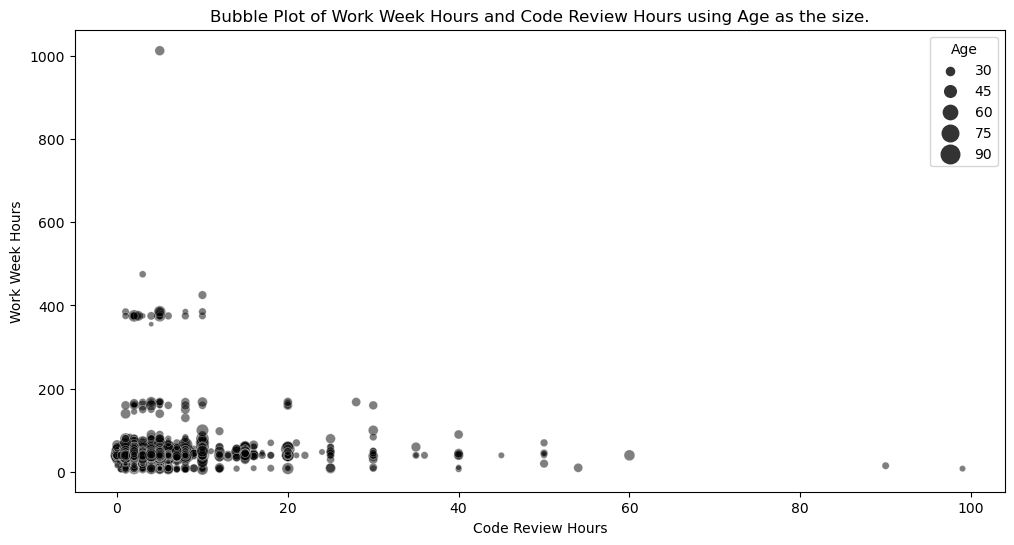

In [12]:
query2 = """
SELECT CodeRevHrs, WorkWeekHrs, Age
FROM master
"""
crh = pd.read_sql_query(query2,conn)
plt.figure(figsize=(12,6))
sns.scatterplot(data=crh,x='CodeRevHrs',y='WorkWeekHrs', size='Age', alpha=0.5, sizes=(1,200), color='black')
plt.ylabel('Work Week Hours')
plt.xlabel('Code Review Hours')
plt.title('Bubble Plot of Work Week Hours and Code Review Hours using Age as the size.')
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


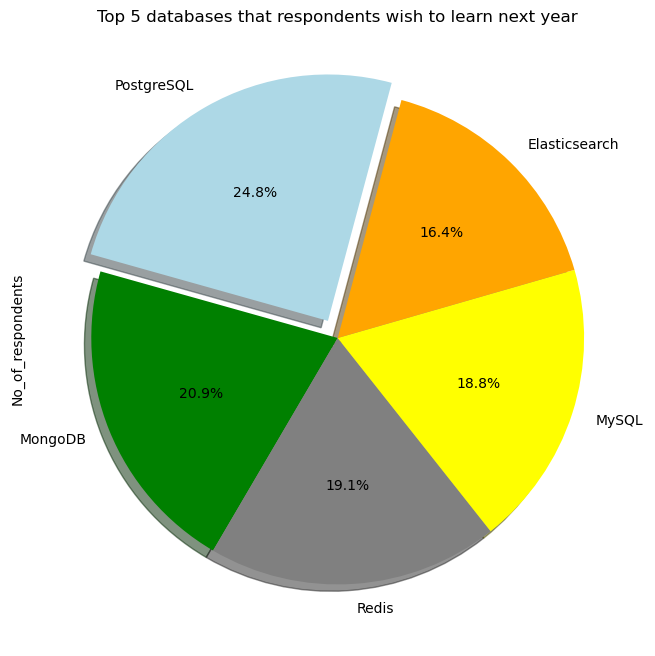

In [13]:
query3 = """
SELECT DatabaseDesireNextYear as Database, count(*) as No_of_respondents
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear 
ORDER BY No_of_respondents DESC LIMIT 5
"""

pie_df = pd.read_sql_query(query3, conn)

pie_df.plot(kind = 'pie', labels = pie_df['Database'], y = 'No_of_respondents',
figsize = (8,8),
autopct='%1.1f%%', #autopct displays percentages in pie chart. so .1f% rounds to 1 decimal place.
colors = ['lightblue', 'green', 'grey', 'yellow', 'orange'],
startangle = 75, #rotate the pie chart according to the degree angle we specify 
explode= (0.08,0,0,0,0), # Bring out the top result
shadow=True, # Stylize some shadows
legend=False) # Turn off the legend
plt.title('Top 5 databases that respondents wish to learn next year')
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


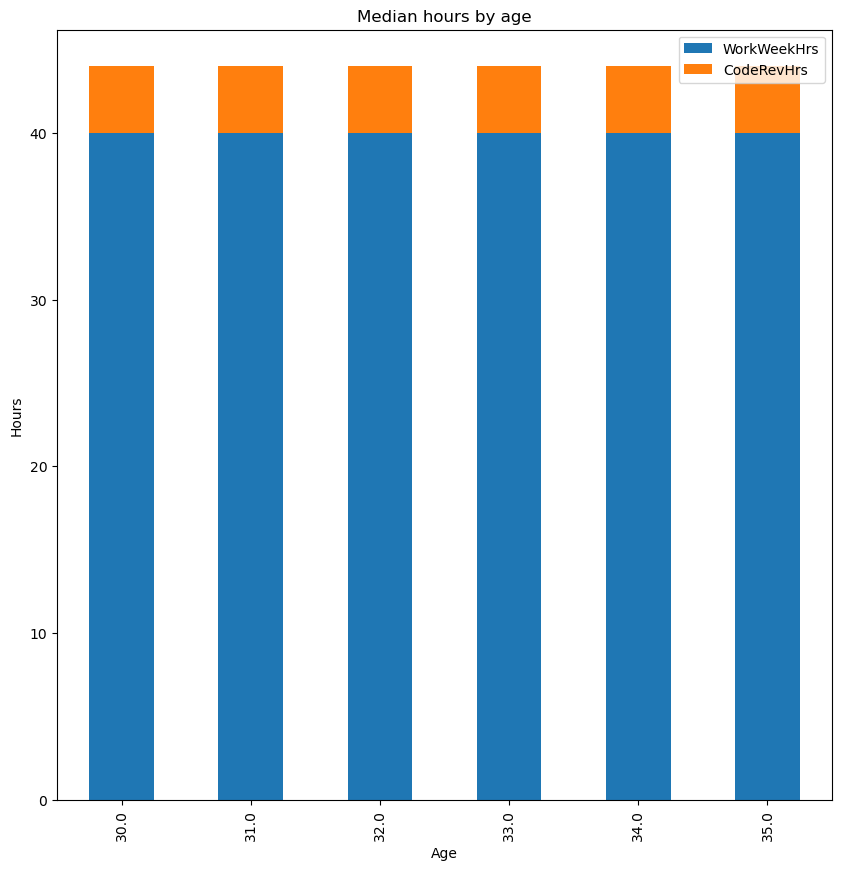

In [14]:
query4 = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
WHERE Age BETWEEN 30 AND 35
"""
stacked_df = pd.read_sql_query(query4, conn)
stacked_df = stacked_df.groupby('Age')[['WorkWeekHrs', 'CodeRevHrs']].median()
stacked_df.plot(kind = 'bar', stacked=True, figsize = (10,10))
plt.xlabel('Age')
plt.ylabel('Hours')
plt.title('Median hours by age')

plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


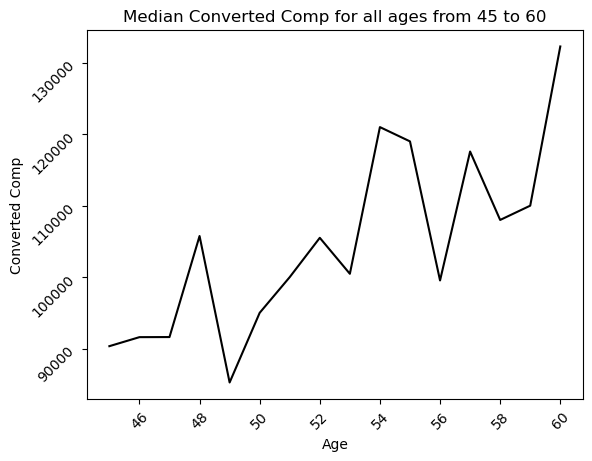

In [15]:
query5 = """
SELECT ConvertedComp, Age
FROM master
WHERE Age BETWEEN 45 AND 60
"""

line_df = pd.read_sql_query(query5, conn)
median_values = line_df.groupby('Age')['ConvertedComp'].median()

#zip() function is used to combine these two lists into a list of tuples
data = pd.DataFrame(list(zip(median_values.index, median_values.values)), columns=['Age', 'MedConvertedComp'])
sns.lineplot(data=data, x='Age', y = 'MedConvertedComp', color='black', )
# Style the figure
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.xlabel('Age')
plt.ylabel('Converted Comp')
plt.title('Median Converted Comp for all ages from 45 to 60')
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


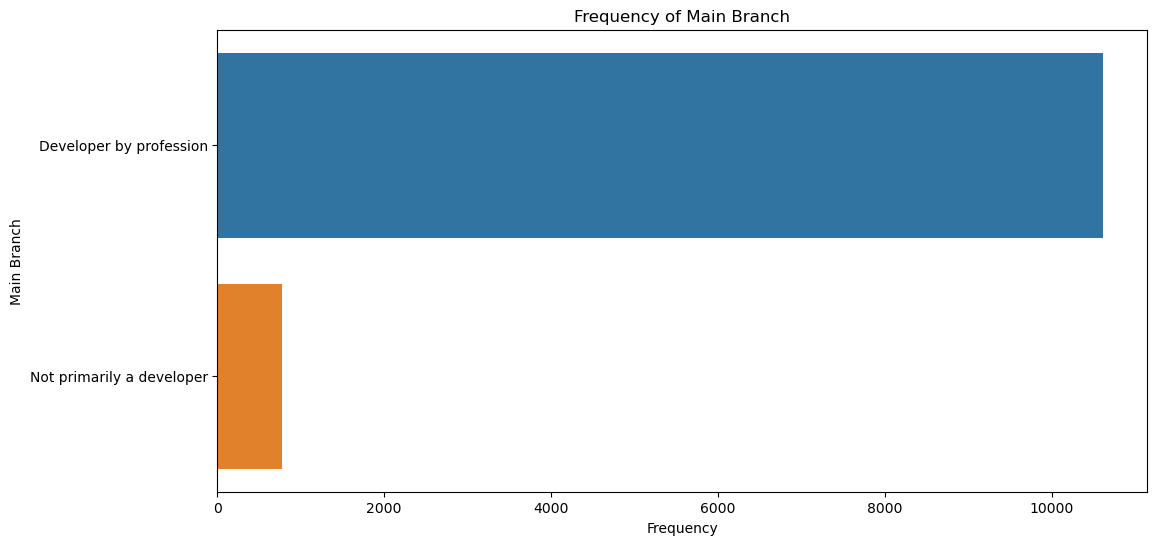

In [16]:
query6 = """
SELECT MainBranch, count(*) as Frequency 
FROM master 
GROUP BY MainBranch
"""

bar_df = pd.read_sql_query(query6, conn)
plt.figure(figsize=(12,6))
sns.barplot(data = bar_df, y='MainBranch', x= 'Frequency', orient='h')
plt.yticks(ticks=[1, 0], labels=['Not primarily a developer', 'Developer by profession'])
plt.xlabel('Frequency')
plt.ylabel('Main Branch')
plt.title('Frequency of Main Branch')
plt.show()

Close the database connection.


In [17]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
